<a href="https://colab.research.google.com/github/SumithSubrayaNayak/SCT_ML_02/blob/main/Machinelearningtask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd


from google.colab import files
uploaded = files.upload()

print(uploaded.keys())  # Ensures 'Mall_Customers.csv' is in the list


import io
try:
    df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))
    print(df.head())
    print(df.info())
except KeyError:
    print("File 'Mall_Customers.csv' not found in the uploaded files.")



Saving Mall_Customers.csv to Mall_Customers.csv
dict_keys(['Mall_Customers.csv'])
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object

In [4]:

X = df.iloc[:, [3, 4]].values  # Assuming 3rd and 4th columns are 'Annual Income (k$)' and 'Spending Score'




In [5]:
# Step 3: Normalize the data

from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

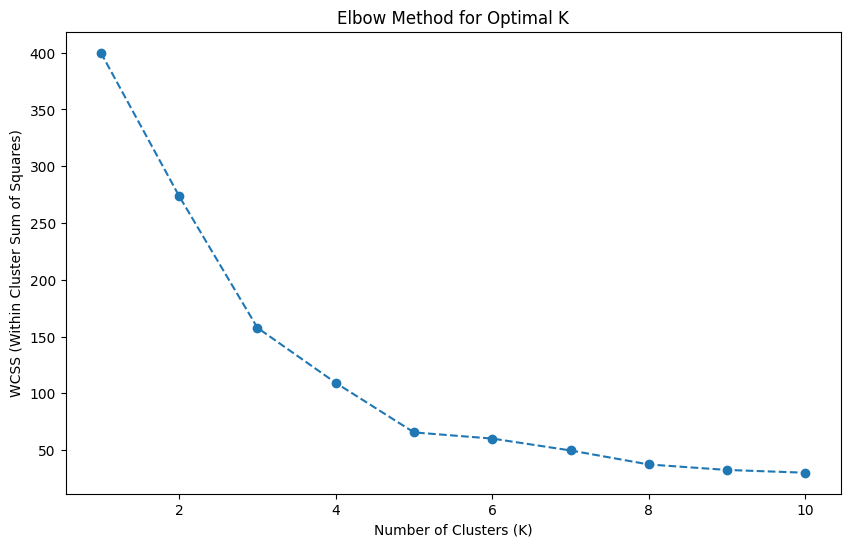

In [6]:
# Step 4: Choose the number of clusters (K) using the Elbow method

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculating WCSS for different values of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [7]:
# Step 5: Train the K-means model with the chosen K

# Choosing K=5 based on the Elbow method
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Adding the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

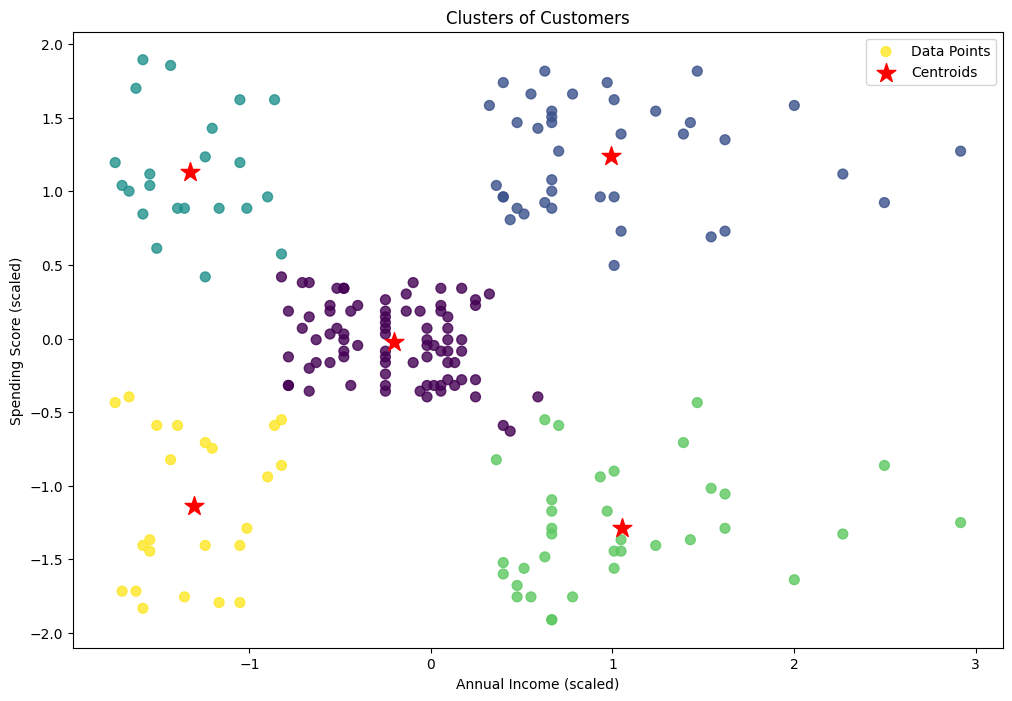

In [8]:
# Step 6: Visualize the clusters

plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8, label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()